# Dataset
In this notebook we'll perform tests on the SIS Dataset.

In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(0,'../')

from datasets import load_dataset,load_from_disk

/home/f296849/miniconda3/Bib/envs/diffusers_dev/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
hf_dir_path = "/mnt/c/BUSDATA/Datasets/CelebAMask-HQ/hf/"
dataset = load_from_disk(hf_dir_path)

In [10]:
import json
print(dataset.column_names)
print(json.loads(dataset['train'].description)['cls_count'])
print(len(dataset['train']))

{'train': ['image_id', 'image', 'annotation'], 'test': ['image_id', 'image', 'annotation']}
19
28500


In [15]:
train_dataset = load_dataset('FrsECM/CelebAHQ_mask',split='train',download_mode="force_redownload")
test_dataset = load_dataset('FrsECM/CelebAHQ_mask',split='test',download_mode="force_redownload")

print(len(test_dataset))
print(len(train_dataset))

Generating test split: 100%|██████████| 101/101 [00:00<00:00, 3992.66 examples/s]

101
101


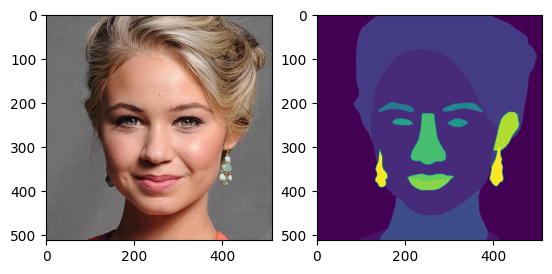

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from torchvision.transforms import Compose,Resize,ToTensor,Normalize

img_size = 512
def transform(examples):
    resize = Resize(img_size)
    transforms_img = Compose([
        resize,
        ToTensor(),
        Normalize(0.5,0.5)
    ])

    examples["image"] = [transforms_img(image.convert("RGB")) for image in examples["image"]]
    examples["annotation"] = [np.array(resize(image)) for image in examples["annotation"]]
    return examples
dataset.set_transform(transform)



fig,ax = plt.subplots(1,2)
data = dataset['test'][0]
x=data["image"]
y=data["annotation"]
x_np = np.array(255*(x+1)/2,dtype=np.uint8).transpose(1,2,0)
ax[0].imshow(x_np,vmax=255)
ax[1].imshow(y)
plt.show()

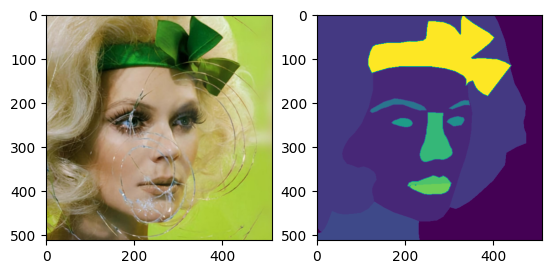

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from torchvision.transforms import Compose,Resize,ToTensor,Normalize

img_size = 512
def transform(examples):
    resize = Resize(img_size)
    transforms_img = Compose([
        resize,
        ToTensor(),
        Normalize(0.5,0.5)
    ])

    examples["image"] = [transforms_img(image.convert("RGB")) for image in examples["image"]]
    examples["annotation"] = [np.array(resize(image)) for image in examples["annotation"]]
    return examples
train_dataset.set_transform(transform)
test_dataset.set_transform(transform)



fig,ax = plt.subplots(1,2)
data = train_dataset[0]
x=data["image"]
y=data["annotation"]
x_np = np.array(255*(x+1)/2,dtype=np.uint8).transpose(1,2,0)
ax[0].imshow(x_np,vmax=255)
ax[1].imshow(y)
plt.show()

## Scheduler DDPM
In this part, we'll have a look on the behavior of DDPM Scheduler...

In [11]:
from diffusers import DDPMScheduler
noise_scheduler = DDPMScheduler()
print(noise_scheduler.config.num_train_timesteps)

1000


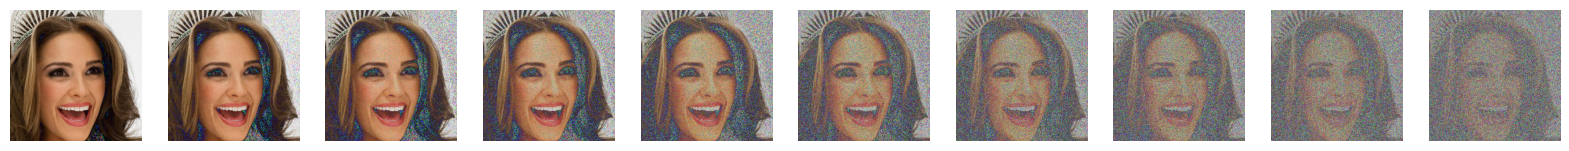

In [12]:
import torch
n_steps = 10
x_n = x.unsqueeze(0).repeat_interleave(n_steps,dim=0)
noise = torch.randn_like(x_n)
timesteps = torch.linspace(1,200,n_steps).long()
noisy_image = noise_scheduler.add_noise(x_n,noise,timesteps)

fig,ax = plt.subplots(1,n_steps,figsize=(20,2))
for i,im in enumerate(noisy_image):
    ax[i].imshow(np.array(127.5*(im+1),dtype=np.uint8).transpose(1,2,0),vmax=255)
    ax[i].axis('off')
plt.show()

'epsilon'